# CyberBullying Detection using NLP & Machine Learning (Dataset creation)

### 1. Libraries

In [79]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### 2. Import Datasets

In [80]:
df_cyberbullying_tweets = pd.read_csv("Datasets/cyberbullying_tweets.csv")
df_cyberBullyingIEEE = pd.read_csv("Datasets/CyberBullyingTypesDataset.csv")
df_cybertroll = pd.read_csv("Datasets/cybertroll_dataset.csv")
df_cyberbullying_classified = pd.read_csv("Datasets/classified_tweets.csv")

### 3.  Check first 10 lines of any dataset

#### 3.1  cyberbullying_tweets.csv

In [81]:
df_cyberbullying_tweets.head(10)

tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying
5  @Raja5aab @Quickieleaks Yes, the test of god i...  not_cyberbullying
6  Itu sekolah ya bukan tempat bully! Ga jauh kay...  not_cyberbullying
7  Karma. I hope it bites Kat on the butt. She is...  not_cyberbullying
8       @stockputout everything but mostly my priest  not_cyberbullying
9  Rebecca Black Drops Out of School Due to Bully...  not_cyberbullying

#### 3.2  CyberBullyingTypesDataset.csv

In [82]:
df_cyberBullyingIEEE.head(10)

Tweet              Class
0  Post-Cuomo push to toughen NY sexual harassmen...  Sexual Harassment
1  Push to toughen NY sexual harassment laws that...  Sexual Harassment
2  @GabbieHanna As if Trisha didn’t accuse him of...  Sexual Harassment
3  @fentsemadii True is that 🔥 thou I know nothin...  Sexual Harassment
4  Watch the recap video of the two-day hands-on ...  Sexual Harassment
5  I think this is sexual harassment.  The duck i...  Sexual Harassment
6  cases of sexual harassment and abuse can never...  Sexual Harassment
7  Sexual harassment policies don’t exist in most...  Sexual Harassment
8  @TheLeadCNN Biden's Afghanistan speech yesterd...  Sexual Harassment
9  Chris Cuomo Breaks Silence About Andrew Cuomo’...  Sexual Harassment

#### 3.3

In [83]:
df_cybertroll.head(10)

content  annotation
0                             Get fucking real dude.           1
1   She is as dirty as they come  and that crook ...           1
2   why did you fuck it up. I could do it all day...           1
3   Dude they dont finish enclosing the fucking s...           1
4   WTF are you talking about Men? No men thats n...           1
5   Ill save you the trouble sister. Here comes a...           1
6   Im dead serious.Real athletes never cheat don...           1
7   ...go absolutely insane.hate to be the bearer...           1
8   Lmao  im watching the same thing ahaha. The g...           1
9   LOL  no he said  What do you call a jail cell...           1

#### 3.4 classified_tweets.csv

In [84]:
df_cyberbullying_classified.head(10)

text  suspicious  \
0    Uhmm like 6th grade on a corner of a street....           0   
1        a) JTP is a douchebag b) Stewart kicks ass!           1   
2                                       ditto bitch!           1   
3  damn I have to drive my dad to the airport tha...           0   
4                                                 :]           0   
5  Hahaa.. Very true.. It might just be some cond...           0   
6                        damn your Jedi mind tricks!           1   
7                                 OMG that sucks! D:           1   
8   If you could have anyone locked in a room so ...           0   
9           umm a homeless guys with blackberry haha           0   

   cyberbullying  hate  suicidal  
0              0     0         0  
1              0     0         0  
2              0     0         0  
3              0     0         0  
4              0     0         0  
5              0     0         0  
6              0     0         0  
7              0     0         0  
8              0     0         0  
9              0     0         0

### 4. Check Datasets type values and sum

#### 4.1  cyberbullying_tweets.csv

In [85]:
df_cyberbullying_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [86]:
df_cyberbullying_tweets['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

#### 4.2  CyberBullyingTypesDataset.csv

In [87]:
df_cyberBullyingIEEE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   2140 non-null   object
 1   Class   2140 non-null   object
dtypes: object(2)
memory usage: 33.6+ KB


In [88]:
df_cyberBullyingIEEE['Class'].value_counts()

Sexual Harassment    500
Slut Shaming         500
Doxing               441
Revenge Porn         396
Cyberstalking        303
Name: Class, dtype: int64

#### 4.3  cybertroll_dataset.csv

In [89]:
df_cybertroll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   content     20001 non-null  object
 1   annotation  20001 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [90]:
df_cybertroll['annotation'].value_counts()

0    12179
1     7822
Name: annotation, dtype: int64

#### 4.4  classified_tweets.csv


In [91]:
df_cyberbullying_classified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19934 entries, 0 to 19933
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           19934 non-null  object
 1   suspicious     19934 non-null  int64 
 2   cyberbullying  19934 non-null  int64 
 3   hate           19934 non-null  int64 
 4   suicidal       19934 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 778.8+ KB


In [92]:
df_cyberbullying_classified['suspicious'].value_counts()

0    12719
1     7215
Name: suspicious, dtype: int64

In [93]:
df_cyberbullying_classified['cyberbullying'].value_counts()

0    17256
2     1733
1      945
Name: cyberbullying, dtype: int64

In [94]:
df_cyberbullying_classified['hate'].value_counts()

0    17256
2     1733
1      945
Name: hate, dtype: int64

In [95]:
df_cyberbullying_classified['suicidal'].value_counts()

0    18886
1     1048
Name: suicidal, dtype: int64

### 5. Graph of any Dataset

#### 5.1 cyberbullying_tweets.csv

[Text(0.5, 1.0, 'Graph of cyberbullying_tweets.csv')]

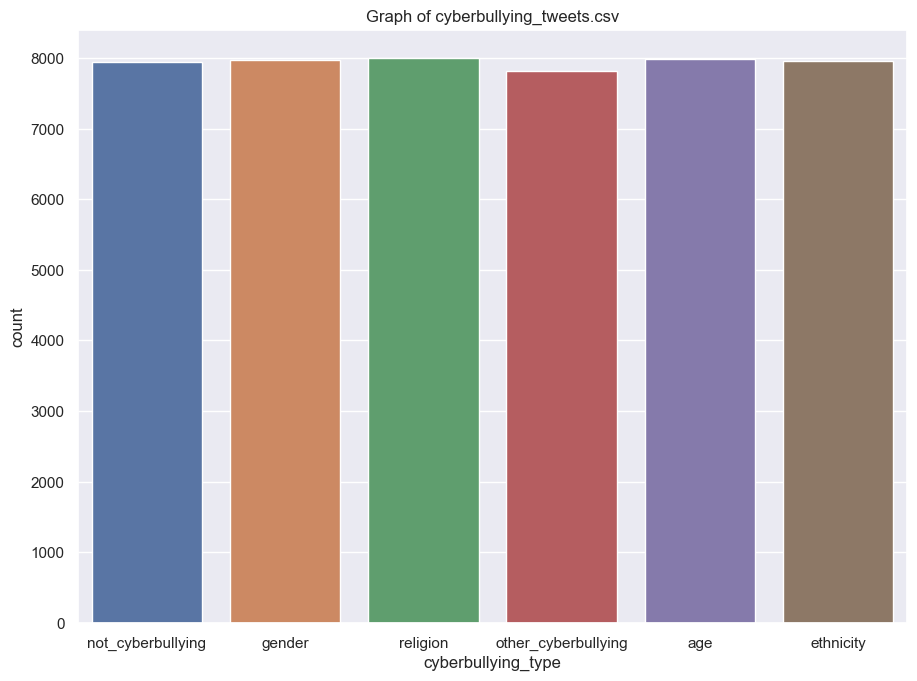

In [96]:
sns.set(rc={'figure.figsize':(10.7,7.7)})
sns.countplot(x='cyberbullying_type', data=df_cyberbullying_tweets).set(title="Graph of cyberbullying_tweets.csv")

#### 5.2 CyberBullyingTypesDataset.csv

[Text(0.5, 1.0, 'Graph of CyberBullyingTypesDataset.csv')]

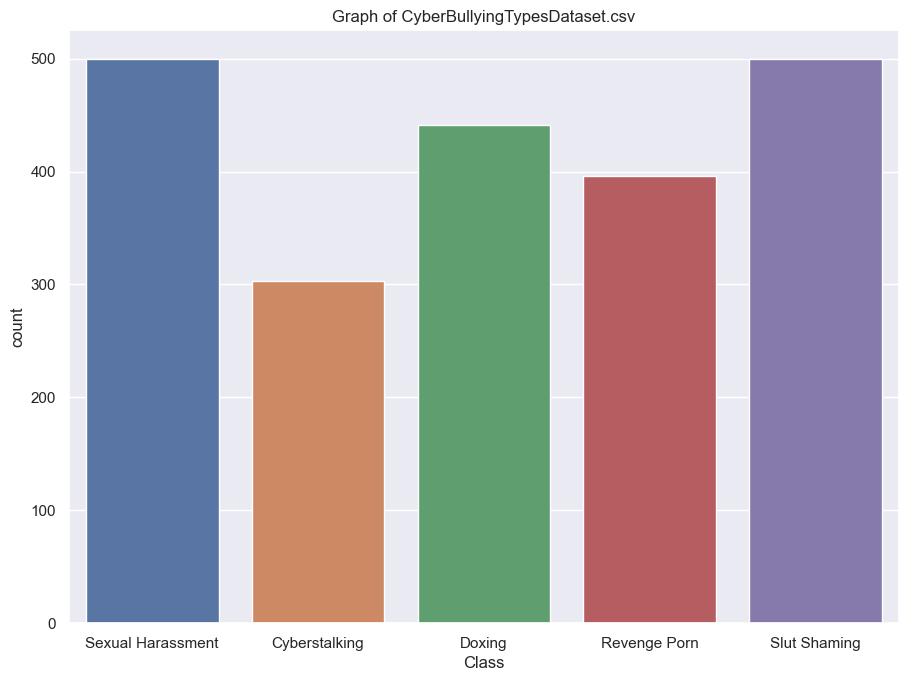

In [97]:
sns.set(rc={'figure.figsize':(10.7,7.7)})
sns.countplot(x='Class', data=df_cyberBullyingIEEE).set(title="Graph of CyberBullyingTypesDataset.csv")

#### 5.3 cybertroll_dataset.csv

[Text(0.5, 1.0, 'Graph of cybertroll_dataset.csv')]

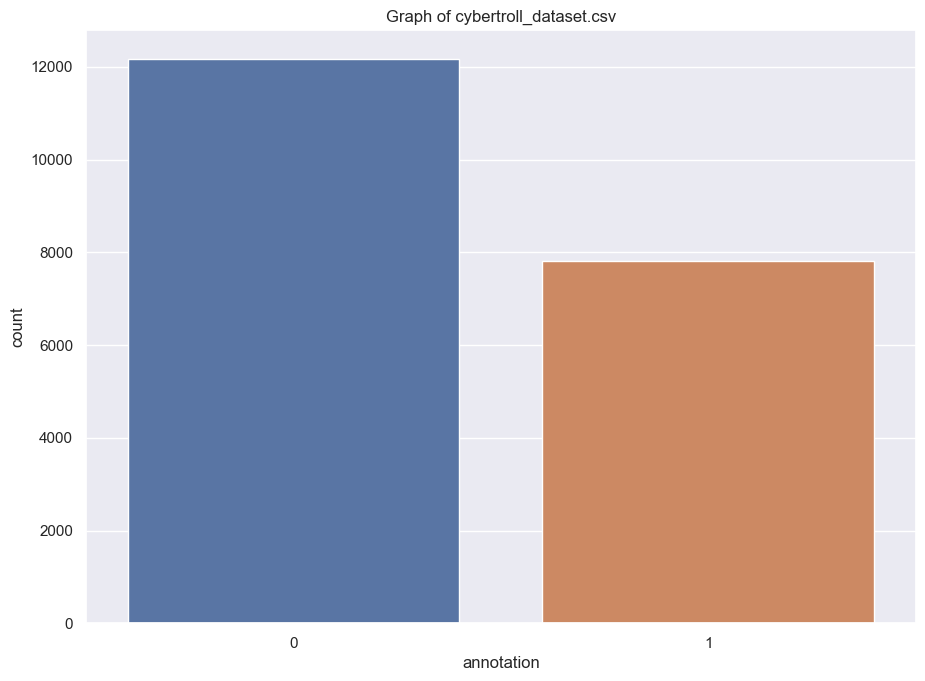

In [98]:
sns.set(rc={'figure.figsize':(10.7,7.7)})
sns.countplot(x='annotation', data=df_cybertroll).set(title="Graph of cybertroll_dataset.csv")

#### 5.4 classified_tweets.csv

[Text(0.5, 1.0, 'Graph of classified_tweets.csv')]

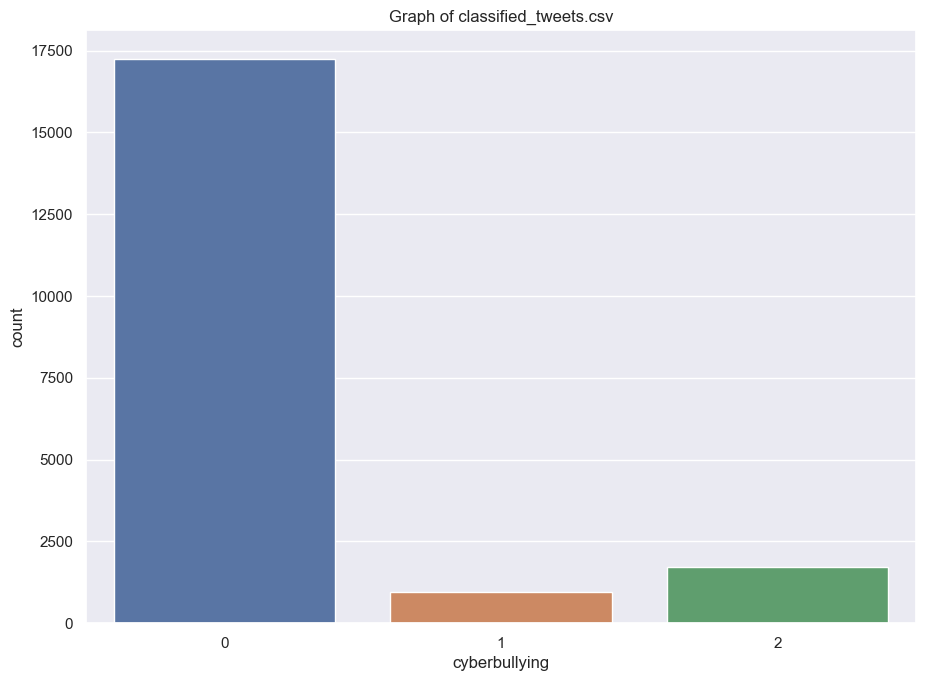

In [99]:
sns.set(rc={'figure.figsize': (10.7, 7.7)})
sns.countplot(x='cyberbullying', data=df_cyberbullying_classified).set(title="Graph of classified_tweets.csv")

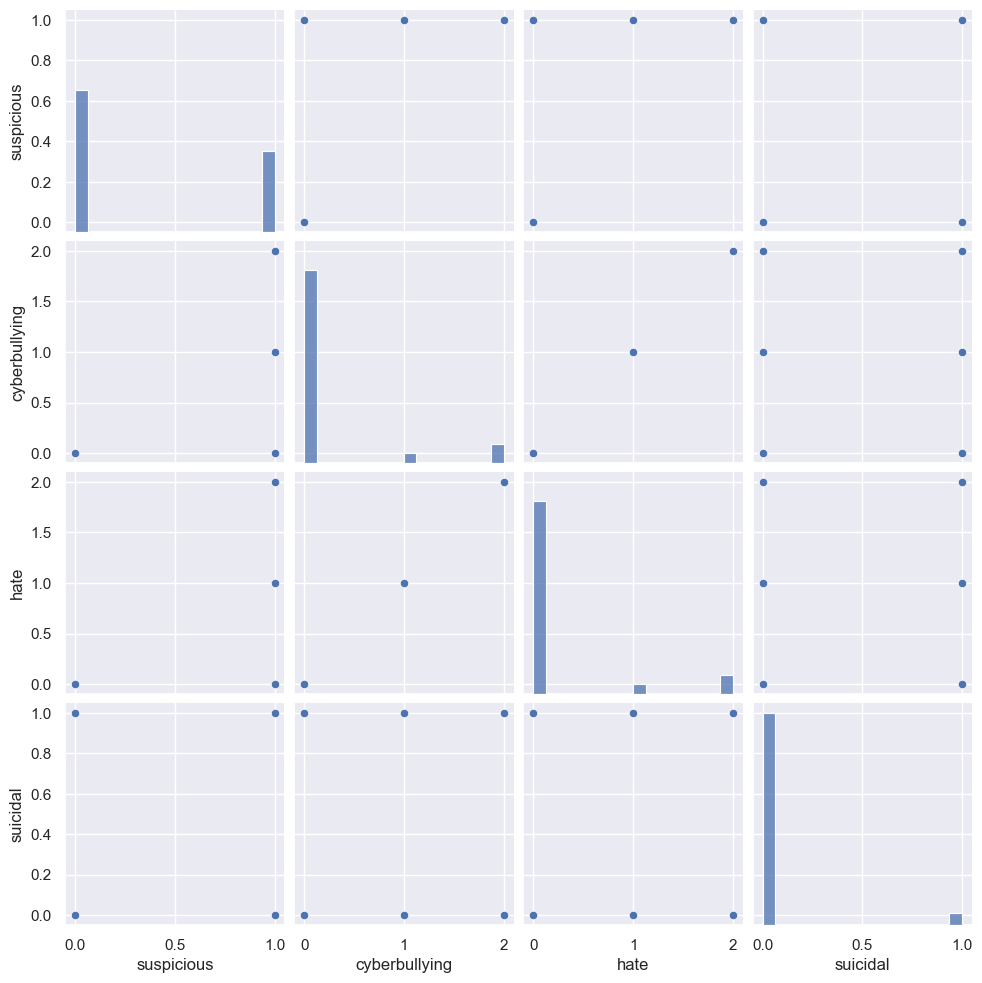

In [100]:
columns = ['suspicious', 'cyberbullying', 'hate', 'suicidal']
sns.pairplot(df_cyberbullying_classified[columns])
plt.show()

### 6. Find & Drop non-English text


In [101]:
from langdetect import detect

def detect_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

#### 6.1 cyberbullying_tweets.csv


In [102]:
df_cyberbullying_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [103]:
df_cyberbullying_tweets = df_cyberbullying_tweets[df_cyberbullying_tweets['tweet_text'].apply(detect_english)]

In [104]:
df_cyberbullying_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44629 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          44629 non-null  object
 1   cyberbullying_type  44629 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


#### 6.2 CyberBullyingTypesDataset.csv

In [105]:
df_cyberBullyingIEEE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   2140 non-null   object
 1   Class   2140 non-null   object
dtypes: object(2)
memory usage: 33.6+ KB


In [106]:
df_cyberBullyingIEEE = df_cyberBullyingIEEE[df_cyberBullyingIEEE['Tweet'].apply(detect_english)]

In [107]:
df_cyberBullyingIEEE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2138
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   2056 non-null   object
 1   Class   2056 non-null   object
dtypes: object(2)
memory usage: 48.2+ KB


#### 6.3 cybertroll_dataset.csv

In [108]:
df_cybertroll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   content     20001 non-null  object
 1   annotation  20001 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [109]:
df_cybertroll = df_cybertroll[df_cybertroll['content'].apply(detect_english)]

In [110]:
df_cybertroll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16975 entries, 0 to 20000
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   content     16975 non-null  object
 1   annotation  16975 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 397.9+ KB


#### 6.4 classified_tweets.csv

In [111]:
df_cyberbullying_classified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19934 entries, 0 to 19933
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           19934 non-null  object
 1   suspicious     19934 non-null  int64 
 2   cyberbullying  19934 non-null  int64 
 3   hate           19934 non-null  int64 
 4   suicidal       19934 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 778.8+ KB


In [112]:
df_cyberbullying_classified = df_cyberbullying_classified[df_cyberbullying_classified['text'].apply(detect_english)]

In [113]:
df_cyberbullying_classified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17717 entries, 0 to 19933
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           17717 non-null  object
 1   suspicious     17717 non-null  int64 
 2   cyberbullying  17717 non-null  int64 
 3   hate           17717 non-null  int64 
 4   suicidal       17717 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 830.5+ KB


In [114]:
# Sum = 81420

### 7. Classification for cyberbullying/not cyberbullying & rename columns

#### 7.1 cyberbullying_tweets.csv

In [115]:
df_cyberbullying_tweets["cyberbullying_type"] = df_cyberbullying_tweets["cyberbullying_type"].replace({"not_cyberbullying": 0})
df_cyberbullying_tweets["cyberbullying_type"] = df_cyberbullying_tweets["cyberbullying_type"].replace({"ethnicity": 1})
df_cyberbullying_tweets["cyberbullying_type"] = df_cyberbullying_tweets["cyberbullying_type"].replace({"age": 1})
df_cyberbullying_tweets["cyberbullying_type"] = df_cyberbullying_tweets["cyberbullying_type"].replace({"gender": 1})
df_cyberbullying_tweets["cyberbullying_type"] = df_cyberbullying_tweets["cyberbullying_type"].replace({"religion": 1})
df_cyberbullying_tweets["cyberbullying_type"] = df_cyberbullying_tweets["cyberbullying_type"].replace({"other_cyberbullying": 1})
df_cyberbullying_tweets.to_csv('ExportedDatasetsNew/cyberbullying_tweets_class.csv', index=False)

In [116]:
df_cyberbullying_tweets.head()

tweet_text  cyberbullying_type
0  In other words #katandandre, your food was cra...                   0
1  Why is #aussietv so white? #MKR #theblock #ImA...                   0
2  @XochitlSuckkks a classy whore? Or more red ve...                   0
3  @Jason_Gio meh. :P  thanks for the heads up, b...                   0
4  @RudhoeEnglish This is an ISIS account pretend...                   0

In [117]:
df_cyberbullying_tweets.tail()

tweet_text  cyberbullying_type
47687  Black ppl aren't expected to do anything, depe...                   1
47688  Turner did not withhold his disappointment. Tu...                   1
47689  I swear to God. This dumb nigger bitch. I have...                   1
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...                   1
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...                   1

In [118]:
df_cyberbullying_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44629 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          44629 non-null  object
 1   cyberbullying_type  44629 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


#### 7.2 CyberBullyingTypesDataset.csv


In [119]:
df_cyberBullyingIEEE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2138
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   2056 non-null   object
 1   Class   2056 non-null   object
dtypes: object(2)
memory usage: 48.2+ KB


In [120]:
df_cyberBullyingIEEE = df_cyberBullyingIEEE.rename(columns=({'Tweet':'tweet_text'}))
df_cyberBullyingIEEE = df_cyberBullyingIEEE.rename(columns=({'Class':'cyberbullying_type'}))
df_cyberBullyingIEEE["cyberbullying_type"] = df_cyberBullyingIEEE["cyberbullying_type"].replace({"Sexual Harassment": 0})
df_cyberBullyingIEEE["cyberbullying_type"] = df_cyberBullyingIEEE["cyberbullying_type"].replace({"Cyberstalking": 1})
df_cyberBullyingIEEE["cyberbullying_type"] = df_cyberBullyingIEEE["cyberbullying_type"].replace({"Doxing": 0})
df_cyberBullyingIEEE["cyberbullying_type"] = df_cyberBullyingIEEE["cyberbullying_type"].replace({"Revenge Porn": 1})
df_cyberBullyingIEEE["cyberbullying_type"] = df_cyberBullyingIEEE["cyberbullying_type"].replace({"Slut Shaming": 1})
df_cyberBullyingIEEE['cyberbullying_type'] = df_cyberBullyingIEEE['cyberbullying_type'].astype('int64')

In [121]:
df_cyberBullyingIEEE.to_csv('ExportedDatasetsNew/CyberBullyingTypesDataset2_class.csv', index=False)

In [122]:
df_cyberBullyingIEEE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2138
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          2056 non-null   object
 1   cyberbullying_type  2056 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 48.2+ KB


#### 7.3 cybertroll_dataset.csv

In [123]:
df_cybertroll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16975 entries, 0 to 20000
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   content     16975 non-null  object
 1   annotation  16975 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 397.9+ KB


In [124]:
df_cybertroll = df_cybertroll.rename(columns=({'content':'tweet_text'}))
df_cybertroll = df_cybertroll.rename(columns=({'annotation':'cyberbullying_type'}))
df_cybertroll.to_csv('ExportedDatasetsNew/cybertroll_dataset_class.csv', index=False)

In [125]:
df_cybertroll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16975 entries, 0 to 20000
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          16975 non-null  object
 1   cyberbullying_type  16975 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 397.9+ KB


#### 7.4 classified_tweets.csv

In [126]:
df_cyberbullying_classified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17717 entries, 0 to 19933
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           17717 non-null  object
 1   suspicious     17717 non-null  int64 
 2   cyberbullying  17717 non-null  int64 
 3   hate           17717 non-null  int64 
 4   suicidal       17717 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 830.5+ KB


In [127]:
df_cyberbullying_classified = df_cyberbullying_classified.drop(columns=['suspicious','hate','suicidal'])
df_cyberbullying_classified = df_cyberbullying_classified.rename(columns=({'text':'tweet_text'}))
df_cyberbullying_classified = df_cyberbullying_classified.rename(columns=({'cyberbullying':'cyberbullying_type'}))
df_cyberbullying_classified["cyberbullying_type"] = df_cyberbullying_classified["cyberbullying_type"].replace({2: 1})
df_cyberbullying_classified.to_csv('ExportedDatasetsNew/classified_tweets_class.csv', index=False)

In [128]:
df_cyberbullying_classified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17717 entries, 0 to 19933
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          17717 non-null  object
 1   cyberbullying_type  17717 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 415.2+ KB


### 8. Addition of Datasets (Final Dataset)

In [129]:
df_cyber = pd.concat([df_cyberbullying_tweets,df_cyberBullyingIEEE,df_cybertroll,df_cyberbullying_classified], axis=0)

In [130]:
# Random
df_cyber = df_cyber.sample(frac=1).reset_index(drop=True)

In [131]:
df_cyber.to_csv('ExportedDatasetsNew/cyberbullying2Random.csv', index=False)

In [132]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81377 entries, 0 to 81376
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          81377 non-null  object
 1   cyberbullying_type  81377 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [133]:
df_cyber.head(10)

tweet_text  cyberbullying_type
0   Yes i knoww! Silly  i could really care less. :)                   0
1   Oh jeez  I had mercifully forgotten about fat...                   1
2   ...it is pretty damn funny to think that Bush...                   0
3  Ignore the NFL. Treat them as if they do not e...                   1
4  i fucking hate explaining like who i am to peo...                   1
5  RT @PatrickLenton: @PatrickLenton while bandit...                   0
6  Why does CHUD hate kids so much? 10 years from...                   0
7       girls that bullied me in high school be like                   1
8         no. i must have missed that one. damn. ;-)                   1
9  a kickstarter is tempting. but I'm just so wei...                   1

### 8.1 Identify & Drop Missing Data

In [134]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81377 entries, 0 to 81376
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          81377 non-null  object
 1   cyberbullying_type  81377 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [135]:
print(df_cyber.isnull().sum())

tweet_text            0
cyberbullying_type    0
dtype: int64


In [136]:
df_cyber = df_cyber.dropna()

In [137]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81377 entries, 0 to 81376
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          81377 non-null  object
 1   cyberbullying_type  81377 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


### 8.2 Identify & Drop Duplicates

In [138]:
print(df_cyber.duplicated().sum())

11288


In [139]:
df_cyber.drop_duplicates(keep=False, inplace=True)

In [140]:
print(df_cyber.duplicated().sum())

0


In [141]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61478 entries, 2 to 81376
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          61478 non-null  object
 1   cyberbullying_type  61478 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


### 8.3 Clean Dataset

In [142]:
def clean_tweets(tweet):
    # remove URL
    tweet = re.sub(r'http\S+', '', tweet)
    # Remove usernames
    tweet = re.sub(r'@[^\s]+[\s]?','',tweet)
    # Remove hashtags
    tweet = re.sub(r'#[^\s]+[\s]?','',tweet)
    # remove special characters
    tweet = re.sub('[^ a-zA-Z0-9]' , '', tweet)
    # remove RT
    tweet = re.sub('RT' , '', tweet)
    # remove Numbers
    tweet = re.sub('[0-9]', '', tweet)

    return tweet

In [143]:
df_cyber["tweet_text"] = df_cyber["tweet_text"].apply(clean_tweets)
df_cyber.to_csv('ExportedDatasetsNew/cyberbullying2Random_clean.csv', index=False)
df_cyber.head(30)

tweet_text  cyberbullying_type
2    it is pretty damn funny to think that Bush dr...                   0
3   Ignore the NFL Treat them as if they do not ex...                   1
4   i fucking hate explaining like who i am to peo...                   1
5    while bandits and dragons still attack my dog...                   0
7        girls that bullied me in high school be like                   1
9   a kickstarter is tempting but Im just so weird...                   1
10  I would love to know why gas is like  cents ch...                   0
11                         Her  rips off her clothes                    1
12  Well we cant make rape jokes about just men th...                   1
14  Demographic shift already happened when KASHMI...                   1
15  Funny a Far Right Radical MAGA dummy Cherry Pi...                   1
16                    Thats what his stupid ass get                     1
19  A lot of the bullys from high school arent sma...                   1
20          or we could not watch    bit over it all                    0
22              Your never supposed to go full retard                   0
23  This is Corona Jihad from Pak there is a reaso...                   1
24   haha yeshhh you are  and you thought i was go...                   0
27  sharing After Nancy Binay Skin Colour Puns Gay...                   1
28  Something about my middle school bullies getti...                   1
29   thats what every dude has said thats seen it ...                   0
30   PT WIFF HIS BIG GAY TEEFS BRYCE FROM TRS AND ...                   1
32  These fuckin FOOLISH ass atheletes   mill down...                   0
33     Ladies and gentle men the Turkish Parliament                     0
34  first impression nice your nickname in my head...                   1
37  FUCK OBAMA dumb ass nigger SOMEBODY HGIVE THIS...                   1
39  Cyberstalking How to prevent cyberstalking rep...                   1
40  stupid cunt dumb ass ugly ass nigger and your ...                   1
41  Everyday since infant school I was bullied got...                   1
42  How good would sudden death be with Annie amp ...                   0
43  Cant blame you for the assumption though My pa...                   1

In [144]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61478 entries, 2 to 81376
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          61478 non-null  object
 1   cyberbullying_type  61478 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [145]:
# Identify rows with empty text
empty_rows = df_cyber[df_cyber.applymap(lambda x: x == '').any(axis=1)]

# Remove these rows from the dataset
df_cyber = df_cyber.drop(empty_rows.index)

In [146]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61361 entries, 2 to 81376
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          61361 non-null  object
 1   cyberbullying_type  61361 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [147]:
df_cyber.to_csv('ExportedDatasetsNew/cyberbullying_clean_empty2Random.csv', index=False)
df_cyber.head(30)

tweet_text  cyberbullying_type
2    it is pretty damn funny to think that Bush dr...                   0
3   Ignore the NFL Treat them as if they do not ex...                   1
4   i fucking hate explaining like who i am to peo...                   1
5    while bandits and dragons still attack my dog...                   0
7        girls that bullied me in high school be like                   1
9   a kickstarter is tempting but Im just so weird...                   1
10  I would love to know why gas is like  cents ch...                   0
11                         Her  rips off her clothes                    1
12  Well we cant make rape jokes about just men th...                   1
14  Demographic shift already happened when KASHMI...                   1
15  Funny a Far Right Radical MAGA dummy Cherry Pi...                   1
16                    Thats what his stupid ass get                     1
19  A lot of the bullys from high school arent sma...                   1
20          or we could not watch    bit over it all                    0
22              Your never supposed to go full retard                   0
23  This is Corona Jihad from Pak there is a reaso...                   1
24   haha yeshhh you are  and you thought i was go...                   0
27  sharing After Nancy Binay Skin Colour Puns Gay...                   1
28  Something about my middle school bullies getti...                   1
29   thats what every dude has said thats seen it ...                   0
30   PT WIFF HIS BIG GAY TEEFS BRYCE FROM TRS AND ...                   1
32  These fuckin FOOLISH ass atheletes   mill down...                   0
33     Ladies and gentle men the Turkish Parliament                     0
34  first impression nice your nickname in my head...                   1
37  FUCK OBAMA dumb ass nigger SOMEBODY HGIVE THIS...                   1
39  Cyberstalking How to prevent cyberstalking rep...                   1
40  stupid cunt dumb ass ugly ass nigger and your ...                   1
41  Everyday since infant school I was bullied got...                   1
42  How good would sudden death be with Annie amp ...                   0
43  Cant blame you for the assumption though My pa...                   1

### 8.5 Remove stopwords

In [148]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    text = text.lower() # Convert to lowercase
    text = [word for word in text.split() if word not in stopwords.words('english')] # Remove stopwords
    return " ".join(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giann\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [149]:
df_cyber["tweet_text"] = df_cyber["tweet_text"].apply(preprocess_text)

In [150]:
df_cyber.to_csv('ExportedDatasetsNew/cyberbullying_final2Random.csv', index=False)

In [151]:
df_cyber.head(10)

tweet_text  cyberbullying_type
2   pretty damn funny think bush drives people cra...                   0
3   ignore nfl treat exist kneel anthem nfl overpa...                   1
4   fucking hate explaining like people dont know ...                   1
5   bandits dragons still attack dog im bloody min...                   0
7                      girls bullied high school like                   1
9   kickstarter tempting im weird money still feel...                   1
10  would love know gas like cents cheaper alabama...                   0
11                                       rips clothes                   1
12  well cant make rape jokes men thats gay jeez g...                   1
14  demographic shift already happened kashmiri hi...                   1

### 8.5 Graph & WordCloud of Dataset

[Text(0.5, 1.0, 'Graph of cyberbullying.csv')]

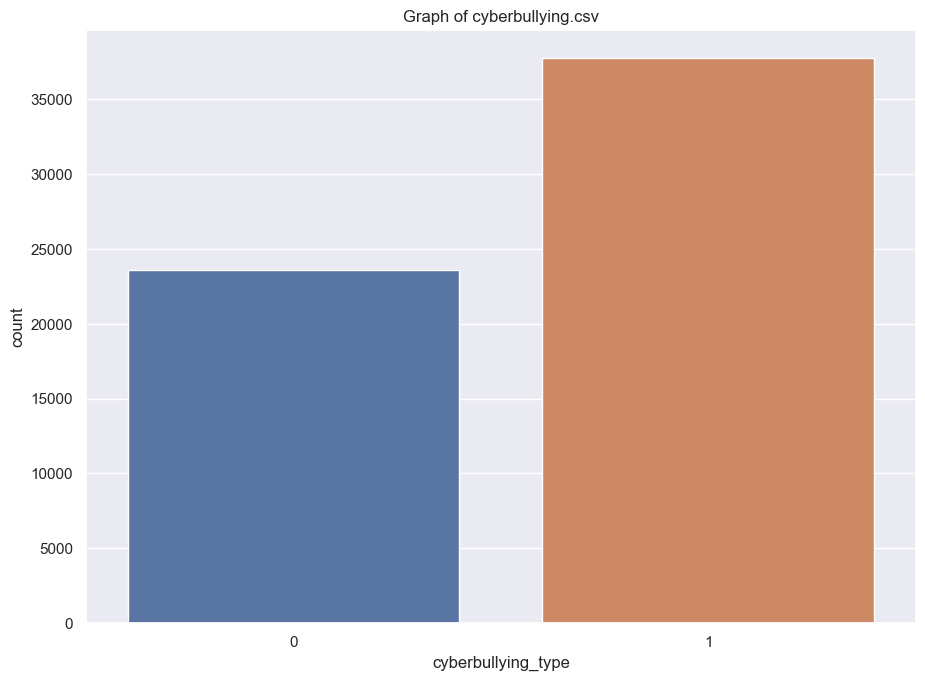

In [152]:
sns.set(rc={'figure.figsize':(10.7,7.7)})
sns.countplot(x='cyberbullying_type', data=df_cyber).set(title="Graph of cyberbullying.csv")

In [153]:
df_cyber["cyberbullying_type"].value_counts()

1    37745
0    23616
Name: cyberbullying_type, dtype: int64

In [154]:
text = ''.join(df_cyber["tweet_text"].tolist())

In [155]:
''.join(df_cyber["tweet_text"].tolist())

'pretty damn funny think bush drives people crazy point resort throwing shoesignore nfl treat exist kneel anthem nfl overpaid jocks wannabe gangbangers whose grades pencil whipped since high school raped girls bullied boys national felons leaguefucking hate explaining like people dont know like expect already know dontbandits dragons still attack dog im bloody mining ore building goddamn solariumgirls bullied high school likekickstarter tempting im weird money still feel kind squick patron tbh blame foss mentalitywould love know gas like cents cheaper alabama georgiarips clotheswell cant make rape jokes men thats gay jeez get timesdemographic shift already happened kashmiri hindus massacred kashmiri muslimstill today none u propagandists write fr exiled victims islamic terrorismindia rectifying mistakes pastwhen demography changed brutality neverfunny far right radical maga dummy cherry picking christian thinks erroneous impressive gif fact still remains support five time draft dodger 

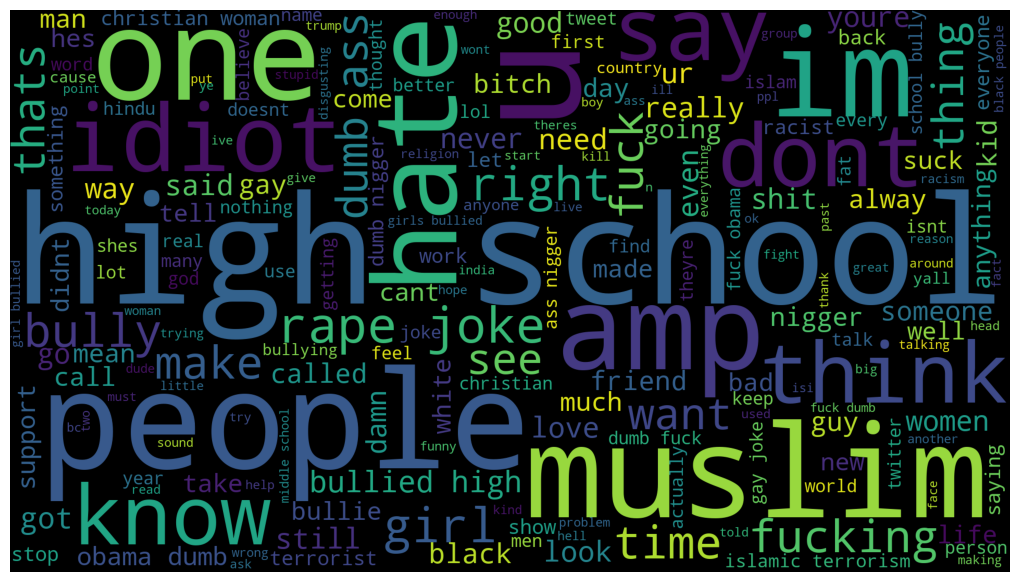

In [156]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()